Plots saved to ../logs/


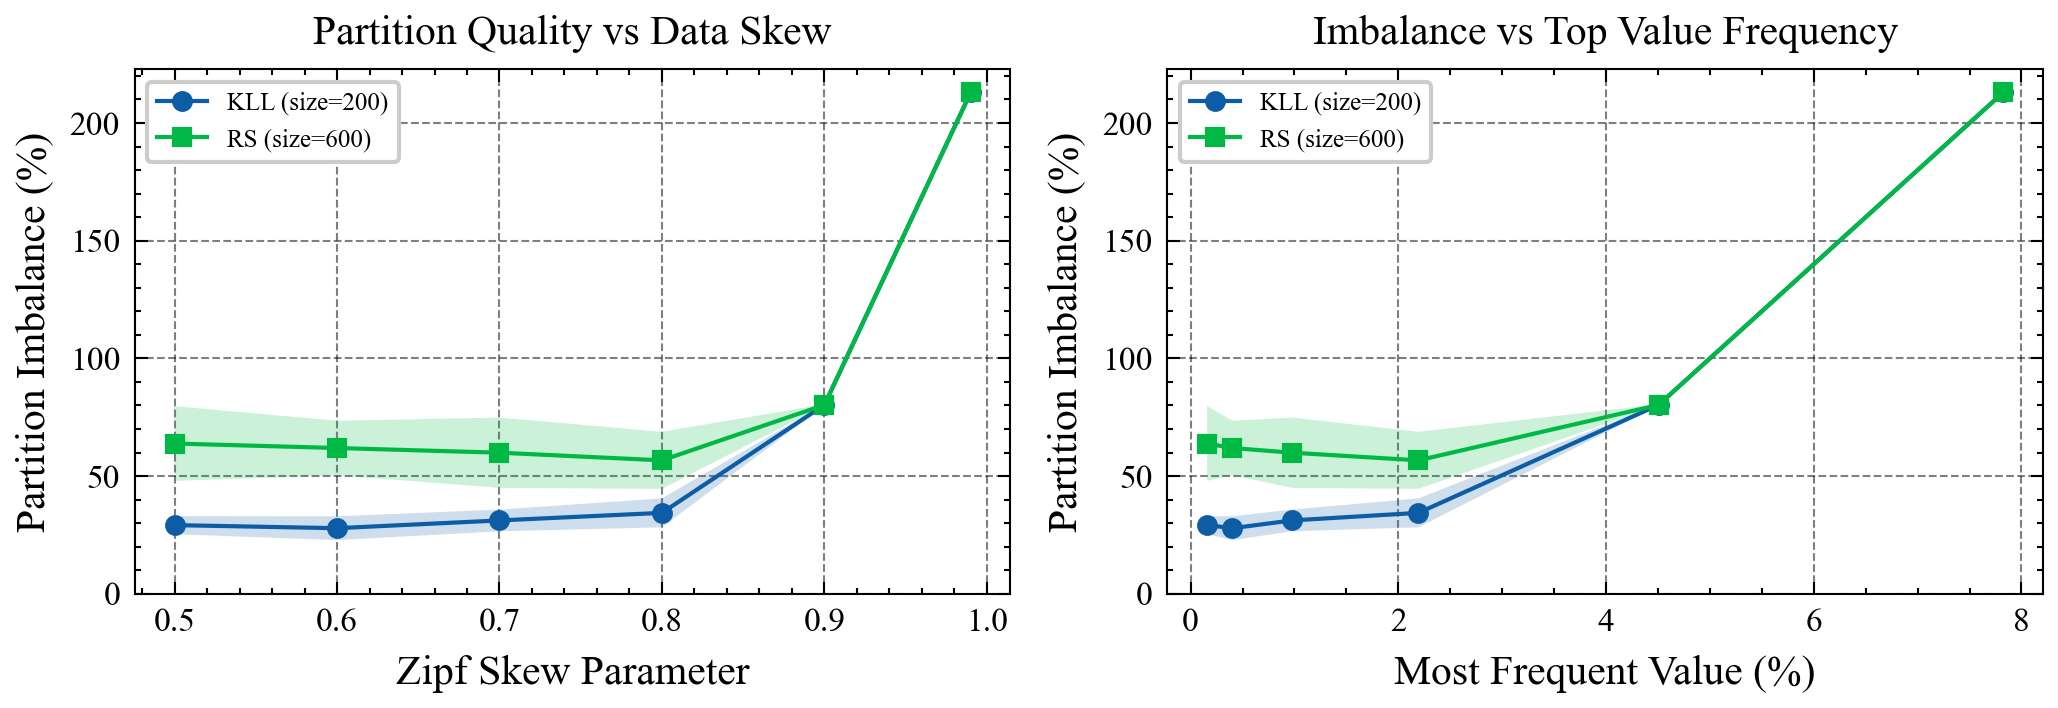


SUMMARY STATISTICS

Partition Imbalance by Skew:
 skew sketch_type  imbalance_pct_mean  imbalance_pct_std
 0.50         KLL            29.15360           3.831529
 0.50          RS            63.82836          15.867775
 0.60         KLL            27.85464           5.062331
 0.60          RS            61.92000          11.593336
 0.70         KLL            31.15212           4.616149
 0.70          RS            59.93104          14.929436
 0.80         KLL            34.37428           6.154361
 0.80          RS            56.67832          12.119134
 0.90         KLL            80.23084           0.283518
 0.90          RS            80.23084           0.283518
 0.99         KLL           212.97356           0.450180
 0.99          RS           212.97356           0.450180

Top Value Frequencies by Skew:
 skew  top1_pct_mean  top2_pct_mean  top3_pct_mean
 0.50        0.15844        0.11209        0.10063
 0.60        0.40295        0.26525        0.23451
 0.70        0.97487    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ==========================================
# CONFIGURATION
# ==========================================
CSV_FILE = '../logs/sketch_partition_benchmark.csv'
OUTPUT_DIR = '../logs/'

# ==========================================
# LOAD DATA
# ==========================================
df = pd.read_csv(CSV_FILE)

# Calculate mean and std for each skew and sketch type
stats_df = df.groupby(['skew', 'sketch_type']).agg({
    'imbalance_pct': ['mean', 'std'],
    'variance': ['mean', 'std'],
    'top1_pct': 'mean',
    'top2_pct': 'mean',
    'top3_pct': 'mean'
}).reset_index()

# Flatten column names
stats_df.columns = ['_'.join(col).strip('_') for col in stats_df.columns.values]

# ==========================================
# PLOTTING
# ==========================================
plt.style.use('../logs/custom_plt_style.mplstyle')

fig, axes = plt.subplots(1, 2, figsize=(7, 2.5))

# Separate data for KLL and RS
kll_data = stats_df[stats_df['sketch_type'] == 'KLL']
rs_data = stats_df[stats_df['sketch_type'] == 'RS']

# ---------------------------------------------------------
# PLOT 1: Imbalance vs Skew
# ---------------------------------------------------------
ax1 = axes[0]

# Plot with error bars (std as shaded region)
ax1.plot(kll_data['skew'], kll_data['imbalance_pct_mean'], 'o-', label='KLL (size=200)', markersize=4)
ax1.fill_between(kll_data['skew'], 
                  kll_data['imbalance_pct_mean'] - kll_data['imbalance_pct_std'],
                  kll_data['imbalance_pct_mean'] + kll_data['imbalance_pct_std'],
                  alpha=0.2)

ax1.plot(rs_data['skew'], rs_data['imbalance_pct_mean'], 's-', label='RS (size=600)', markersize=4)
ax1.fill_between(rs_data['skew'],
                  rs_data['imbalance_pct_mean'] - rs_data['imbalance_pct_std'],
                  rs_data['imbalance_pct_mean'] + rs_data['imbalance_pct_std'],
                  alpha=0.2)

ax1.set_xlabel('Zipf Skew Parameter')
ax1.set_ylabel('Partition Imbalance (%)')
ax1.set_title('Partition Quality vs Data Skew')
ax1.legend()
ax1.set_ylim(bottom=0)

# ---------------------------------------------------------
# PLOT 2: Imbalance vs Top Value Frequency
# ---------------------------------------------------------
ax2 = axes[1]

# Use top1_pct as x-axis to show relationship between data skew and partition quality
ax2.plot(kll_data['top1_pct_mean'], kll_data['imbalance_pct_mean'], 'o-', label='KLL (size=200)', markersize=4)
ax2.fill_between(kll_data['top1_pct_mean'],
                  kll_data['imbalance_pct_mean'] - kll_data['imbalance_pct_std'],
                  kll_data['imbalance_pct_mean'] + kll_data['imbalance_pct_std'],
                  alpha=0.2)

ax2.plot(rs_data['top1_pct_mean'], rs_data['imbalance_pct_mean'], 's-', label='RS (size=600)', markersize=4)
ax2.fill_between(rs_data['top1_pct_mean'],
                  rs_data['imbalance_pct_mean'] - rs_data['imbalance_pct_std'],
                  rs_data['imbalance_pct_mean'] + rs_data['imbalance_pct_std'],
                  alpha=0.2)

ax2.set_xlabel('Most Frequent Value (%)')
ax2.set_ylabel('Partition Imbalance (%)')
ax2.set_title('Imbalance vs Top Value Frequency')
ax2.legend()
ax2.set_ylim(bottom=0)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/sketch_partition_comparison.png', dpi=300)
plt.savefig(f'{OUTPUT_DIR}/sketch_partition_comparison.svg')
print(f"Plots saved to {OUTPUT_DIR}")
plt.show()

# ==========================================
# PRINT SUMMARY STATISTICS
# ==========================================
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print("\nPartition Imbalance by Skew:")
print(stats_df[['skew', 'sketch_type', 'imbalance_pct_mean', 'imbalance_pct_std']].to_string(index=False))

print("\nTop Value Frequencies by Skew:")
print(stats_df[['skew', 'top1_pct_mean', 'top2_pct_mean', 'top3_pct_mean']].drop_duplicates().to_string(index=False))